# Data Science Capstone Project - Setting up a Indian Restaurant in Stockholm Sweden


For this project, we will be focusing on the following data factors:

Number of existing Indian restaurants in the neighbourhood (any type of restaurant)
Number of and distance to Indian restaurants in the neighbourhood
Distance of neighbourhood from Stockholm city center

First we will import the required libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas data frame

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
!pip install --upgrade pyOpenSSL

Requirement already up-to-date: pyOpenSSL in ./opt/anaconda3/lib/python3.7/site-packages (19.1.0)


In [255]:
import re

## Web Scraping Neighbourhood Data

Importing of neighborhood data

In [122]:
url = requests.get('https://en.wikipedia.org/wiki/Category:Districts_of_Stockholm').text
soup = BeautifulSoup(url,"html.parser")

In [125]:
lis = []
for li in soup.findAll('li'):
    if li.find(href="/wiki/Portal:Stockholm"):
        break
    if li.find(href=re.compile("^/wiki/")):
        lis.append(li)

### Now we do the Data Wrangling by Loading and Cleaning Neighbourhood data¶


In [141]:
neigh = []
for i in range(0,len(lis)):
    neigh.append(lis[i].text.strip())
    
df = pd.DataFrame(neigh)
df.columns = ['Neighbourhood']

In [142]:
df.head()

,Neighbourhood
0,"► Djurgården‎ (4 C, 10 P)"
1,► Districts in Västerort‎ (22 P)
2,Abrahamsberg
3,Alvik
4,Älvsjö


In [143]:
df['Neighbourhood'] = df.Neighbourhood.str.partition('[')[0] #Removes the citation and reference brackets
df['Neighbourhood'] = df.Neighbourhood.str.partition(',')[0] #Removes the alternatives for 'Bel Air'
df['Neighbourhood'] = df.Neighbourhood.str.partition('(')[0] #Removes the citation and reference brackets
df=df[df.Neighbourhood!='Baldwin Hills/Crenshaw'] #Removes redundancy as 'Baldwin Hills' and 'Crenshaw' exist already
df=df[df.Neighbourhood!='Hollywood Hills West'] #Removes redundancy as it has the same coordinates as 'Hollywood Hills'
df=df[df.Neighbourhood!='Brentwood Circle'] #Removes redundancy as it has the same coordinates as 'Brentwood'
df=df[df.Neighbourhood!='Wilshire Park'] #Removes redundancy as it has the same coordinates as 'Wilshire Center'
df.reset_index(inplace=True,drop=True)

In [144]:
df.head()

,Neighbourhood
0,► Djurgården‎
1,► Districts in Västerort‎
2,Abrahamsberg
3,Alvik
4,Älvsjö


### Now we obtain the Neighbourhood Coordinates¶

In [145]:
# define the data frame columns
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the data frame
nhoods = pd.DataFrame(columns=column_names)

By using GeoPy Nominatim geolocator we get the lat and lon of neigborhoods

In [148]:
geolocator = Nominatim(user_agent="la_explorer",timeout=5)
for i in range(0,len(df)):
    
    address = df.Neighbourhood[i]+', Stockholm'
    location = geolocator.geocode(address)
    if location == None:
        latitude = 0
        longitude = 0
    else:
        latitude = location.latitude
        longitude = location.longitude

    nhoods = nhoods.append({'Neighbourhood': df.Neighbourhood[i],
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)

In [149]:
nhoods

,Neighbourhood,Latitude,Longitude
0,► Djurgården‎,0,0
1,► Districts in Västerort‎,0,0
2,Abrahamsberg,0,0
3,Alvik,0,0
4,Älvsjö,0,0
5,Aspudden,0,0
6,Axelsberg,0,0
7,Bagarmossen,0,0
8,Bandhagen,0,0
9,Birkastaden,0,0


In [150]:
nhoods['Latitude']=nhoods['Latitude'].astype(float)
nhoods['Longitude']=nhoods['Longitude'].astype(float)

nhoods=nhoods[(nhoods.Latitude>24)] 
nhoods.reset_index(inplace=True,drop=True)

In [151]:
nhoods

,Neighbourhood,Latitude,Longitude
0,Björkhagen,25.144690,67.184777
1,Gamla stan,59.323732,18.068609
2,Marieberg,24.859221,67.023996
3,Södermalm,59.323732,18.068609
4,City districts,25.072674,67.203465
5,► Djurgården‎,59.325168,18.121606
6,Abrahamsberg,59.336468,17.953763
7,Alvik,59.333401,17.982279
8,Älvsjö,59.275849,18.001890
9,Aspudden,59.306466,18.001373


Now we delete neighbourhoods with missing (zero) values and obvious geocoding errors: -

In [152]:
address = 'Stockholm, Sweden'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Stockholm, Sweden are 59.3251172, 18.0710935.


## Now we load Stockholm neighbourhood Map

In [153]:
# create map of Stockholm using latitude and longitude values
map_kar = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(nhoods['Latitude'], nhoods['Longitude'], nhoods['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_kar)  
    
map_kar

Now we Define Foursquare Credentials and Version

In [154]:
CLIENT_ID = 'GXCGAWZFPUUMM1BVQBLTQ5BRCEVHZWDIG1FCNKMRSYPLKDXP' # Foursquare ID
CLIENT_SECRET = 'TXX4O4O4M0NTKP25OWDDR1HFRGNB05PK4S0EEJ0FDGJKRYK4' # Foursquare Secret
VERSION = '20200228' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GXCGAWZFPUUMM1BVQBLTQ5BRCEVHZWDIG1FCNKMRSYPLKDXP
CLIENT_SECRET: TXX4O4O4M0NTKP25OWDDR1HFRGNB05PK4S0EEJ0FDGJKRYK4


Now we create a map of Stockholm with neighbourhoods superimposed on top: -

In [161]:
neighbourhood_latitude = nhoods.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = nhoods.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = nhoods.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Björkhagen are 25.1446897, 67.1847767315734.


In [162]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)

In [163]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3ef8db8758c95cfe5ef970'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 25.149189704500007,
    'lng': 67.18973852525201},
   'sw': {'lat': 25.140189695499995, 'lng': 67.17981493789478}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

In [164]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [159]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/Users/awais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: "None of [Index(['venue.name', 'venue.categories', 'venue.location.lat',\n       'venue.location.lng'],\n      dtype='object')] are in the [columns]"

In [165]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [166]:
kar_venues = getNearbyVenues(names=nhoods['Neighbourhood'],
                                   latitudes=nhoods['Latitude'],
                                   longitudes=nhoods['Longitude']
                                  )

In [167]:
print(kar_venues.shape)
kar_venues

(1328, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gamla stan,59.323732,18.068609,Science Fiction Bokhandeln,59.324047,18.070682,Bookstore
1,Gamla stan,59.323732,18.068609,Corner Club,59.323342,18.069431,Cocktail Bar
2,Gamla stan,59.323732,18.068609,19 Glas Bar & Matsal,59.324633,18.068670,Wine Bar
3,Gamla stan,59.323732,18.068609,Barrels Burgers & Beer,59.324685,18.068513,Burger Joint
4,Gamla stan,59.323732,18.068609,Stortorget,59.324973,18.070727,Plaza
5,Gamla stan,59.323732,18.068609,Tweed,59.324471,18.067696,Cocktail Bar
6,Gamla stan,59.323732,18.068609,Pharmarium,59.324851,18.070891,Cocktail Bar
7,Gamla stan,59.323732,18.068609,Fabrique Stenugnsbageri,59.323625,18.068700,Bakery
8,Gamla stan,59.323732,18.068609,Slingerbulten,59.324376,18.068967,Scandinavian Restaurant
9,Gamla stan,59.323732,18.068609,Gaston - Wine Exploring,59.323206,18.068640,Wine Bar


In [168]:
kar_venues_count=kar_venues.groupby('Neighbourhood').count()
kar_venues_count.drop(kar_venues_count.columns[[0,1,3,4,5]], axis=1,inplace=True)

In [169]:
kar_venues_count.reset_index(inplace=True)

In [170]:
pop_neigh=kar_venues_count[(kar_venues_count.Venue>=10)]
pop_neigh.reset_index(drop=True,inplace=True)
pop_neigh

,Neighbourhood,Venue
0,Alvik,18
1,Aspudden,20
2,Bandhagen,12
3,Farsta,20
4,Farsta strand,11
5,Fruängen,20
6,Gamla stan,142
7,Gröndal,10
8,Gärdet,33
9,Hägerstensåsen,11


In [171]:
pop_list=pop_neigh['Neighbourhood'].values.tolist()

for i in range(0,len(kar_venues)):

    if kar_venues.iloc[i,0] not in pop_list:
        kar_venues.iloc[i,0]='TO DROP'

kar_venues=kar_venues[kar_venues.Neighbourhood!='TO DROP']
kar_venues.reset_index(drop=True,inplace=True)

In [172]:
kar_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gamla stan,59.323732,18.068609,Science Fiction Bokhandeln,59.324047,18.070682,Bookstore
1,Gamla stan,59.323732,18.068609,Corner Club,59.323342,18.069431,Cocktail Bar
2,Gamla stan,59.323732,18.068609,19 Glas Bar & Matsal,59.324633,18.068670,Wine Bar
3,Gamla stan,59.323732,18.068609,Barrels Burgers & Beer,59.324685,18.068513,Burger Joint
4,Gamla stan,59.323732,18.068609,Stortorget,59.324973,18.070727,Plaza
5,Gamla stan,59.323732,18.068609,Tweed,59.324471,18.067696,Cocktail Bar
6,Gamla stan,59.323732,18.068609,Pharmarium,59.324851,18.070891,Cocktail Bar
7,Gamla stan,59.323732,18.068609,Fabrique Stenugnsbageri,59.323625,18.068700,Bakery
8,Gamla stan,59.323732,18.068609,Slingerbulten,59.324376,18.068967,Scandinavian Restaurant
9,Gamla stan,59.323732,18.068609,Gaston - Wine Exploring,59.323206,18.068640,Wine Bar


In [173]:
print('There are {} uniques categories.'.format(len(kar_venues['Venue Category'].unique())))

There are 204 uniques categories.


In [174]:
# one hot encoding
kar_onehot = pd.get_dummies(kar_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to data frame
kar_onehot['Neighbourhood'] = kar_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [kar_onehot.columns[-1]] + list(kar_onehot.columns[:-1])
kar_onehot = kar_onehot[fixed_columns]

kar_onehot.head()

,Neighbourhood,Accessories Store,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Bike Shop,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Coworking Space,Cupcake Shop,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kitchen Supply Store,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Palace,Park,Pedestrian Plaza,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pier,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Pub,Rafting,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Yoga Studio
0,Gamla stan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Gamla stan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Gamla stan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [175]:
kar_grouped = kar_onehot.groupby('Neighbourhood').mean().reset_index()
kar_grouped

,Neighbourhood,Accessories Store,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Bike Shop,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Coworking Space,Cupcake Shop,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kitchen Supply Store,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Palace,Park,Pedestrian Plaza,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pier,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Pub,Rafting,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Yoga Studio
0,Alvik,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.00,0.055556,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [176]:
num_top_venues = 5

for hood in kar_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = kar_grouped[kar_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['VENUE','FREQ']
    temp = temp.iloc[1:]
    temp['FREQ'] = temp['FREQ'].astype(float)
    temp = temp.round({'FREQ': 2})
    print(temp.sort_values('FREQ', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alvik----
         VENUE  FREQ
0        Hotel  0.11
1  Pizza Place  0.11
2         Café  0.06
3    Gastropub  0.06
4        Plaza  0.06


----Aspudden----
               VENUE  FREQ
0        Pizza Place  0.10
1  Convenience Store  0.10
2    Thai Restaurant  0.10
3               Café  0.05
4      Metro Station  0.05


----Bandhagen----
           VENUE  FREQ
0    Bus Station  0.17
1    Pizza Place  0.17
2  Metro Station  0.08
3     Hobby Shop  0.08
4  Grocery Store  0.08


----Farsta----
                VENUE  FREQ
0                Café  0.10
1  Italian Restaurant  0.10
2    Toy / Game Store  0.05
3    Sushi Restaurant  0.05
4         Supermarket  0.05


----Farsta strand----
               VENUE  FREQ
0  Convenience Store  0.18
1              Plaza  0.09
2      Train Station  0.09
3        Bus Station  0.09
4       Burger Joint  0.09


----Fruängen----
                     VENUE  FREQ
0     Fast Food Restaurant  0.10
1              Pizza Place  0.10
2  Scandinavian Restaurant  0.05

In [177]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [178]:
import numpy as np
num_top_venues = 12

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new data frame
Neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhoods_venues_sorted['Neighbourhood'] = kar_grouped['Neighbourhood']

for ind in np.arange(kar_grouped.shape[0]):
    Neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kar_grouped.iloc[ind, :], num_top_venues)

Neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue
0,Alvik,Pizza Place,Hotel,Gym / Fitness Center,Park,Convenience Store,Scandinavian Restaurant,Furniture / Home Store,Café,Modern European Restaurant,Gastropub,Grocery Store,Thai Restaurant
1,Aspudden,Pizza Place,Thai Restaurant,Convenience Store,Grocery Store,Golf Course,Sushi Restaurant,Bistro,Metro Station,Flea Market,Bakery,Bookstore,Mini Golf
2,Bandhagen,Pizza Place,Bus Station,Hobby Shop,Stadium,Sushi Restaurant,Metro Station,Mediterranean Restaurant,Café,Grocery Store,Playground,Farmers Market,Fast Food Restaurant
3,Farsta,Café,Italian Restaurant,Clothing Store,Supermarket,Sushi Restaurant,Liquor Store,Taco Place,Coffee Shop,Grocery Store,Sandwich Place,Gym / Fitness Center,Convenience Store
4,Farsta strand,Convenience Store,Plaza,Sushi Restaurant,Pizza Place,Fast Food Restaurant,Bus Station,Metro Station,Supermarket,Burger Joint,Train Station,Hobby Shop,Furniture / Home Store


In [181]:
from sklearn.metrics import silhouette_score

kar_grouped_clustering = kar_grouped.drop('Neighbourhood', 1)

for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(kar_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(kar_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.06767891089988111
For n_clusters=3, The Silhouette Coefficient is 0.10885779238397311
For n_clusters=4, The Silhouette Coefficient is 0.11762237241693241
For n_clusters=5, The Silhouette Coefficient is 0.043997726911998616
For n_clusters=6, The Silhouette Coefficient is 0.14722547511083978
For n_clusters=7, The Silhouette Coefficient is 0.09900691626141524
For n_clusters=8, The Silhouette Coefficient is 0.06868997439686232
For n_clusters=9, The Silhouette Coefficient is 0.07147047365801146
For n_clusters=10, The Silhouette Coefficient is -0.0040960999714031
For n_clusters=11, The Silhouette Coefficient is 0.06993010798893032
For n_clusters=12, The Silhouette Coefficient is 0.08231851201220865
For n_clusters=13, The Silhouette Coefficient is 0.09279867235052422
For n_clusters=14, The Silhouette Coefficient is 0.07082688203439154
For n_clusters=15, The Silhouette Coefficient is 0.06613996418631665
For n_clusters=16, The Silhouette Coeffic

In [182]:
# set number of clusters
kclusters = 4

kar_grouped_clustering = kar_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kar_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([2, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 3, 1, 3, 0, 3, 1, 3], dtype=int32)

In [183]:
# add clustering labels
Neighbourhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# Neighbourhoods_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
kar_merged = nhoods

# merge la_grouped with nhoods to add latitude/longitude for each Neighbourhood
kar_merged = kar_merged.join(Neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
kar_merged.dropna(inplace=True)
kar_merged['Cluster Label'] = kar_merged['Cluster Label'].astype(int)
kar_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue
1,Gamla stan,59.323732,18.068609,3,Scandinavian Restaurant,Plaza,Café,Wine Bar,Bakery,Cocktail Bar,Boat or Ferry,Historic Site,Pub,Bar,Gastropub,Hotel
2,Marieberg,24.859221,67.023996,3,Indian Restaurant,Restaurant,Grocery Store,Ice Cream Shop,Beach,Pizza Place,Plaza,Salad Place,Scandinavian Restaurant,Clothing Store,Museum,Café
3,Södermalm,59.323732,18.068609,3,Scandinavian Restaurant,Bakery,Bar,Coffee Shop,Italian Restaurant,Cocktail Bar,Indian Restaurant,Café,Bookstore,French Restaurant,Wine Bar,Pub
7,Alvik,59.333401,17.982279,2,Pizza Place,Hotel,Gym / Fitness Center,Park,Convenience Store,Scandinavian Restaurant,Furniture / Home Store,Café,Modern European Restaurant,Gastropub,Grocery Store,Thai Restaurant
9,Aspudden,59.306466,18.001373,3,Pizza Place,Thai Restaurant,Convenience Store,Grocery Store,Golf Course,Sushi Restaurant,Bistro,Metro Station,Flea Market,Bakery,Bookstore,Mini Golf


In [184]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[2]='#006000'
rainbow[1]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kar_merged['Latitude'], kar_merged['Longitude'], kar_merged['Neighbourhood'], kar_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 100px; left: 50px; width: 120px; height: 100px; 
                            border:3px solid black; z-index:9999; font-size:13px;
                            ">&nbsp; Green - Cluster 0 <br>
                              &nbsp; Red - Cluster 1 <br>
                              &nbsp; Purple - Cluster 2 <br>
                              &nbsp; Blue - Cluster 3 </i>
                </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

In [185]:
kar_merged.loc[kar_merged['Cluster Label'] == 0, kar_merged.columns[[0] + list(range(4, kar_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue
35,Högdalen,Gym / Fitness Center,Playground,Skate Park,Liquor Store,Fish Market,Clothing Store,Shopping Plaza,Burger Joint,Pet Store,Grocery Store,Fountain,Forest
37,Johanneshov,Hockey Arena,Nightclub,Gym / Fitness Center,Diner,Thai Restaurant,Chinese Restaurant,Scenic Lookout,General Entertainment,Sporting Goods Shop,Music Venue,Stadium,Supermarket
73,Talk,Hotel,Supermarket,IT Services,Convention Center,Shopping Mall,Coffee Shop,Gym / Fitness Center,Yoga Studio,Food & Drink Shop,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant
74,Talk,Hotel,Supermarket,IT Services,Convention Center,Shopping Mall,Coffee Shop,Gym / Fitness Center,Yoga Studio,Food & Drink Shop,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant


In [186]:
kar_merged.loc[kar_merged['Cluster Label'] == 1, kar_merged.columns[[0] + list(range(4, kar_merged.shape[1]))]]


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue
12,Bandhagen,Pizza Place,Bus Station,Hobby Shop,Stadium,Sushi Restaurant,Metro Station,Mediterranean Restaurant,Café,Grocery Store,Playground,Farmers Market,Fast Food Restaurant
21,Farsta,Café,Italian Restaurant,Clothing Store,Supermarket,Sushi Restaurant,Liquor Store,Taco Place,Coffee Shop,Grocery Store,Sandwich Place,Gym / Fitness Center,Convenience Store
22,Farsta strand,Convenience Store,Plaza,Sushi Restaurant,Pizza Place,Fast Food Restaurant,Bus Station,Metro Station,Supermarket,Burger Joint,Train Station,Hobby Shop,Furniture / Home Store
24,Fruängen,Pizza Place,Fast Food Restaurant,Electronics Store,Steakhouse,Sushi Restaurant,Liquor Store,Metro Station,Thai Restaurant,Grocery Store,Convenience Store,Gym / Fitness Center,Scandinavian Restaurant
66,Stora Essingen,Bus Stop,Plaza,Light Rail Station,Pizza Place,Deli / Bodega,French Restaurant,Soccer Field,Café,Supermarket,Bus Station,Asian Restaurant,Italian Restaurant
72,Västertorp,Pizza Place,Bakery,Plaza,Convenience Store,Playground,Electronics Store,Grocery Store,Supermarket,Asian Restaurant,Scandinavian Restaurant,Metro Station,Fast Food Restaurant


In [187]:
kar_merged.loc[kar_merged['Cluster Label'] == 2, kar_merged.columns[[0] + list(range(4, kar_merged.shape[1]))]]


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue
7,Alvik,Pizza Place,Hotel,Gym / Fitness Center,Park,Convenience Store,Scandinavian Restaurant,Furniture / Home Store,Café,Modern European Restaurant,Gastropub,Grocery Store,Thai Restaurant
42,Långholmen,Café,Harbor / Marina,Rafting,Hotel,Beach,Indonesian Restaurant,History Museum,Pizza Place,Scandinavian Restaurant,Bus Stop,Spanish Restaurant,Italian Restaurant
55,Reimersholme,Café,Hotel,Beach,History Museum,Bus Stop,Sushi Restaurant,Scandinavian Restaurant,Rafting,Other Nightlife,Pizza Place,Event Space,Italian Restaurant
56,Riddarholmen,Scandinavian Restaurant,Cocktail Bar,Hotel,Plaza,Wine Bar,Park,Bookstore,Food Truck,Record Shop,Lounge,Café,Burger Joint


In [188]:
kar_merged.loc[kar_merged['Cluster Label'] == 3, kar_merged.columns[[0] + list(range(4, kar_merged.shape[1]))]]


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue
1,Gamla stan,Scandinavian Restaurant,Plaza,Café,Wine Bar,Bakery,Cocktail Bar,Boat or Ferry,Historic Site,Pub,Bar,Gastropub,Hotel
2,Marieberg,Indian Restaurant,Restaurant,Grocery Store,Ice Cream Shop,Beach,Pizza Place,Plaza,Salad Place,Scandinavian Restaurant,Clothing Store,Museum,Café
3,Södermalm,Scandinavian Restaurant,Bakery,Bar,Coffee Shop,Italian Restaurant,Cocktail Bar,Indian Restaurant,Café,Bookstore,French Restaurant,Wine Bar,Pub
9,Aspudden,Pizza Place,Thai Restaurant,Convenience Store,Grocery Store,Golf Course,Sushi Restaurant,Bistro,Metro Station,Flea Market,Bakery,Bookstore,Mini Golf
26,Gamla stan,Scandinavian Restaurant,Plaza,Café,Wine Bar,Bakery,Cocktail Bar,Boat or Ferry,Historic Site,Pub,Bar,Gastropub,Hotel
27,Gärdet,Bus Stop,Thai Restaurant,Sushi Restaurant,Bakery,Café,Asian Restaurant,Smoke Shop,Chocolate Shop,Restaurant,Coffee Shop,Convenience Store,Pizza Place
28,Gröndal,Beach,Other Nightlife,Pizza Place,Sushi Restaurant,Food Truck,Bakery,Indian Restaurant,Café,Persian Restaurant,Forest,Escape Room,Gaming Cafe
31,Hägerstensåsen,Café,Indian Restaurant,Gym / Fitness Center,Forest,Bus Station,Playground,Metro Station,Greek Restaurant,Grocery Store,Pizza Place,History Museum,Flea Market
38,Kärrtorp,Convenience Store,Athletics & Sports,Sushi Restaurant,Grocery Store,Tennis Court,Thai Restaurant,Metro Station,Bakery,Plaza,Scandinavian Restaurant,Pizza Place,Mountain
39,Kristineberg,Café,Park,Playground,Thai Restaurant,Mini Golf,Pizza Place,Plaza,Convenience Store,Beach,Indian Restaurant,Track,Athletics & Sports


In [189]:
kar_results = pd.DataFrame(kmeans.cluster_centers_)
kar_results.columns = kar_grouped_clustering.columns
kar_results.index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']
kar_results['Total Sum'] = kar_results.sum(axis = 1)
kar_results

,Accessories Store,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Bike Shop,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Convention Center,Coworking Space,Cupcake Shop,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kitchen Supply Store,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Palace,Park,Pedestrian Plaza,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pier,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Pub,Rafting,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Yoga Studio,Total Sum
Cluster 0,2.710505e-20,0.015873,0.000000e+00,-5.421011e-20,0.000000,4.336809e-19,-1.084202e-19,0.000000,0.000000,-1.084202e-19,0.000000,0.000000,4.336809e-19,0.000000e+00,1.084202e-19,0.000000,0.000000,0.000000,0.000000,0.000000,-5.421011e-20,0.000000,0.000000e+00,-2.710505e-20,0.030303,0.000000e+00,0.000000,3.469447e-18,0.000000,0.000000e+00,0.000000e+00,0.015873,1.587302e-02,0.000000,-2.710505e-20,0.000000e+00,0.000000,0.030303,0.000000,0.052910,-2.710505e-20,0.000000,0.000000,3.703704e-02,2.710505e-20,2.710505e-20,2.710505e-20,0.000000e+00,0.000000,0.000000,0.000000,0.015873,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.710505e-20,3.030303e-02,0.000000,0.000000e+00,0.000000,0.000000,-8.673617e-19,4.336809e-19,0.000000,0.000000,0.000000,-5.421011e-20,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.587302e-02,0.000000,0.000000,1.587302e-02,0.000000,0.000000,0.000000,0.030303,0.000000,0.129389,0.000000,-2.168404e-19,0.000000,0.000000,0.000000e+00,3.174603e-02,0.000000,0.000000,8.994709e-02,0.000000,3.703704e-02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-2.710505e-20,0.000000,0.000000e+00,0.0

In [190]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [191]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#0000FF')
        else:
            colors.append('#FF0000')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#0000FF', edgecolor='#0000FF',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#FF0000', edgecolor='#FF0000',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

,Gym / Fitness Center,Hotel,Supermarket,Coffee Shop,Liquor Store,Shopping Mall,Convention Center,IT Services,Nightclub,Hockey Arena,Skate Park,Pet Store,Shopping Plaza,Grocery Store,Fish Market,Burger Joint,Playground,Clothing Store,Stadium,Chinese Restaurant,Sporting Goods Shop,Thai Restaurant,Scenic Lookout,Diner,American Restaurant,Caucasian Restaurant,Go Kart Track,General Entertainment,Music Venue,Bus Stop,Other Nightlife,Rafting,Forest,Art Museum,Mediterranean Restaurant,Bar,Record Shop,Noodle House,Palace,Outdoor Sculpture,Beer Bar,Cupcake Shop,Organic Grocery,Czech Restaurant,Photography Lab,Coworking Space,Multiplex,Newsstand,Accessories Store,Lounge,Pharmacy,Library,Light Rail Station,Persian Restaurant,Park,Miscellaneous Shop,Movie Theater,Modern European Restaurant,Mexican Restaurant,Mini Golf,Monument / Landmark,Mongolian Restaurant,Men's Store,Office,Metro Station,Museum,Mountain,Salad Place,Pier,Tourist Information Center,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Thrift / Vintage Store,Toy / Game Store,Sports Bar,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Watch Shop,Wine Bar,Steakhouse,Spiritual Center,Pizza Place,Sandwich Place,Plaza,Poke Place,Pub,Ramen Restaurant,Restaurant,Roof Deck,Juice Bar,Scandinavian Restaurant,Spanish Restaurant,Seafood Restaurant,Shoe Store,Smoke Shop,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Kebab Restaurant,Intersection,Fast Food Restaurant,Chocolate Shop,Climbing Gym,Cocktail Bar,Concert Hall,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Jazz Club,Flea Market,Flower Shop,City Hall,Castle,Food Court,Candy Store,Amphitheater,Art Gallery,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Beach,Bike Shop,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bus Line,Bus Station,Café,Food & Drink Shop,Yoga Studio,Historic Site,Fountain,Indian Restaurant,Gourmet Shop,Greek Restaurant,Gym,Harbor / Marina,Indonesian Restaurant,History Museum,Gluten-free Restaurant,Hobby Shop,Hostel,Hot Dog Joint,Indie Theater,Hotel Bar,Indie Movie Theater,Golf Course,Ice Cream Shop,Gift Shop,Gaming Cafe,French Restaurant,Fried Chicken Joint,Italian Restaurant,Furniture / Home Store,Japanese Restaurant,Garden,Gas Station,Gastropub,Moving Target,Church,Irish Pub,Building,Fish & Chips Shop,Theme Restaurant,Polish Restaurant,Comic Shop,Arcade,Kitchen Supply Store,Karaoke Bar,Middle Eastern Restaurant,Boxing Gym,Fruit & Vegetable Store,Szechuan Restaurant,Optical Shop,BBQ Joint,Pedestrian Plaza,Tram Station,Arts & Crafts Store,Latin American Restaurant,Peruvian Restaurant,Pool Hall,Hawaiian Restaurant,Vietnamese Restaurant,Food Truck
Cluster 0,0.129389,0.089947,0.089947,0.05291,0.046176,0.037037,0.037037,0.037037,0.031746,0.031746,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873,3.469447e-18,8.673617e-19,8.673617e-19,4.336809e-19,4.336809e-19,4.336809e-19,4.336809e-19,2.168404e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.710505e-20,-2.710505e-20,-2.710505e-20,-2.710505e-20,-2.710505e-20,-2.710505e-20,-2.710505e-20,-2.710505e-20,-5

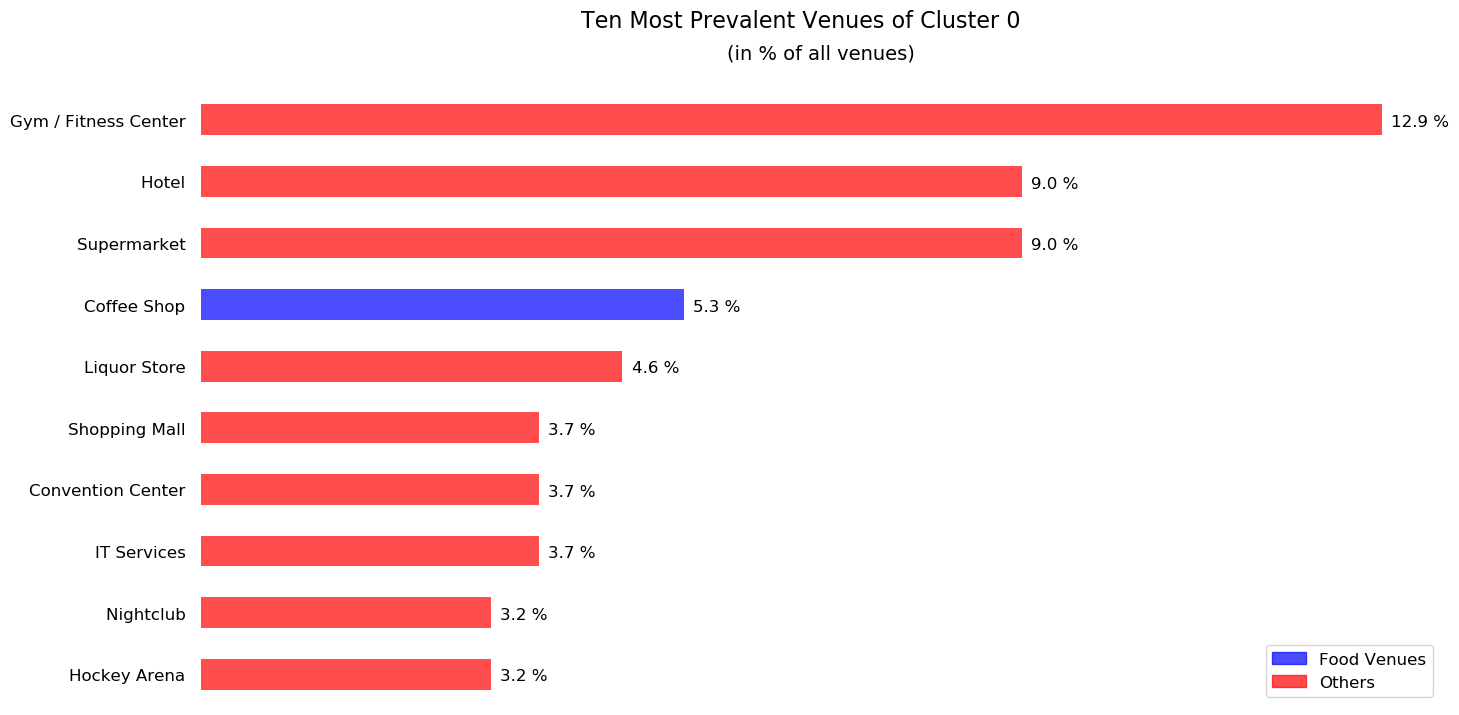

In [192]:
cluster0=pd.DataFrame(kar_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

,Pizza Place,Bus Station,Convenience Store,Supermarket,Fast Food Restaurant,Café,Metro Station,Sushi Restaurant,Grocery Store,Plaza,Italian Restaurant,Bus Stop,Playground,Asian Restaurant,Bakery,Scandinavian Restaurant,Electronics Store,Gym / Fitness Center,Liquor Store,Burger Joint,Train Station,Hobby Shop,Mediterranean Restaurant,Stadium,French Restaurant,Light Rail Station,Deli / Bodega,Soccer Field,Toy / Game Store,Coffee Shop,Clothing Store,Thai Restaurant,Sandwich Place,Steakhouse,Pharmacy,Juice Bar,Shopping Mall,Department Store,Taco Place,Hotel,Food Truck,Vietnamese Restaurant,Office,Castle,Convention Center,Bus Line,IT Services,Seafood Restaurant,Dance Studio,Flower Shop,Breakfast Spot,Hawaiian Restaurant,Arts & Crafts Store,BBQ Joint,Tram Station,Peruvian Restaurant,Pool Hall,Pedestrian Plaza,Optical Shop,Spiritual Center,Garden,Szechuan Restaurant,Latin American Restaurant,Arcade,Karaoke Bar,Kitchen Supply Store,Middle Eastern Restaurant,Boxing Gym,Fruit & Vegetable Store,Moving Target,Irish Pub,Polish Restaurant,Building,Fish & Chips Shop,Comic Shop,Church,Theme Restaurant,Miscellaneous Shop,Museum,Sports Bar,Movie Theater,Mountain,Mongolian Restaurant,Tourist Information Center,Modern European Restaurant,Roof Deck,Sporting Goods Shop,Mini Golf,Tapas Restaurant,Tea Room,Tennis Court,Theater,Wine Bar,Mexican Restaurant,Music Venue,Nightclub,Restaurant,Skate Park,Ramen Restaurant,Pub,Salad Place,Scenic Lookout,Poke Place,Vegetarian / Vegan Restaurant,Shoe Store,Video Game Store,Trail,Spanish Restaurant,Smoke Shop,South American Restaurant,Persian Restaurant,South Indian Restaurant,Watch Shop,Park,Spa,Track,Intersection,Yoga Studio,Men's Store,Food & Drink Shop,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Flea Market,Food Court,Dessert Shop,Fountain,Fried Chicken Joint,Lounge,Gas Station,Gastropub,General Entertainment,Diner,Concert Hall,Gluten-free Restaurant,Boat or Ferry,Amphitheater,Art Gallery,Athletics & Sports,Bagel Shop,Bike Shop,Bistro,Bookstore,Cocktail Bar,Bowling Alley,Brazilian Restaurant,Caucasian Restaurant,Chocolate Shop,City Hall,Climbing Gym,Gift Shop,Furniture / Home Store,Go Kart Track,Indie Movie Theater,Hostel,Hot Dog Joint,Hotel Bar,Ice Cream Shop,Hockey Arena,History Museum,Indian Restaurant,Historic Site,Harbor / Marina,Indie Theater,Gym,Indonesian Restaurant,American Restaurant,Jazz Club,Greek Restaurant,Kebab Restaurant,Gourmet Shop,Library,Golf Course,Cupcake Shop,Multiplex,Newsstand,Coworking Space,Czech Restaurant,Organic Grocery,Photography Lab,Accessories Store,Outdoor Sculpture,Candy Store,Gaming Cafe,Beer Bar,Noodle House,Palace,Record Shop,Japanese Restaurant,Pier,Art Museum,Bar,Monument / Landmark,Forest,Pet Store,Shopping Plaza,Fish Market,Chinese Restaurant,Thrift / Vintage Store,Other Nightlife,Rafting,Beach
Cluster 1,0.104559,0.064083,0.058874,0.056543,0.052056,0.051709,0.049278,0.045707,0.04246,0.039877,0.037821,0.033974,0.025794,0.024725,0.02381,0.020238,0.020238,0.016667,0.016667,0.015152,0.015152,0.013889,0.013889,0.013889,0.012821,0.012821,0.012821,0.012821,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,6.938894e-18,8.673617e-19,8.673617e-19,4.336809e-19,4.336809e-19,4.336809e-19,4.336809e-19,4.336809e-19,4.336809e-19,2.168404e-19,2.168404e-19,2.168404e-19,2.168404e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,1.084202e-19,5.421011e-20,5.421011e-20,5.421011e-20,5.421011e-20,5.421011e-20,5.421011e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,2.710505e-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

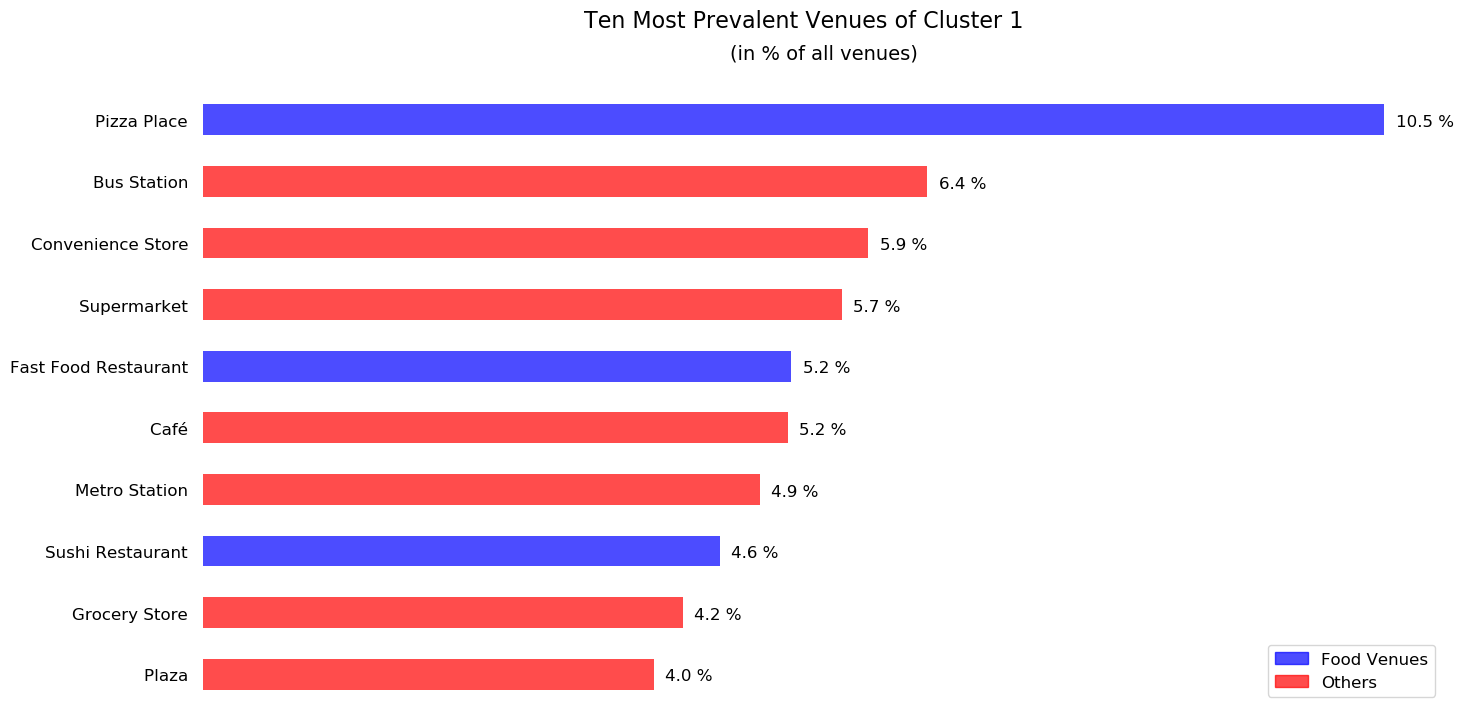

In [193]:
cluster1=pd.DataFrame(kar_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

,Pizza Place,Bakery,Pakistani Restaurant,Auto Dealership,Auto Workshop,Supermarket,Bus Station,Sandwich Place,American Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Market,Middle Eastern Restaurant,Snack Place,Restaurant,Hookah Bar,Steakhouse,Tea Room,Thai Restaurant,Hotel,Gastropub,Gym / Fitness Center,Asian Restaurant,Frozen Yogurt Shop,Food & Drink Shop,Fast Food Restaurant,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Café,Burger Joint,Breakfast Spot,Boutique,BBQ Joint,Women's Store
Cluster 2,0.272727,0.181818,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


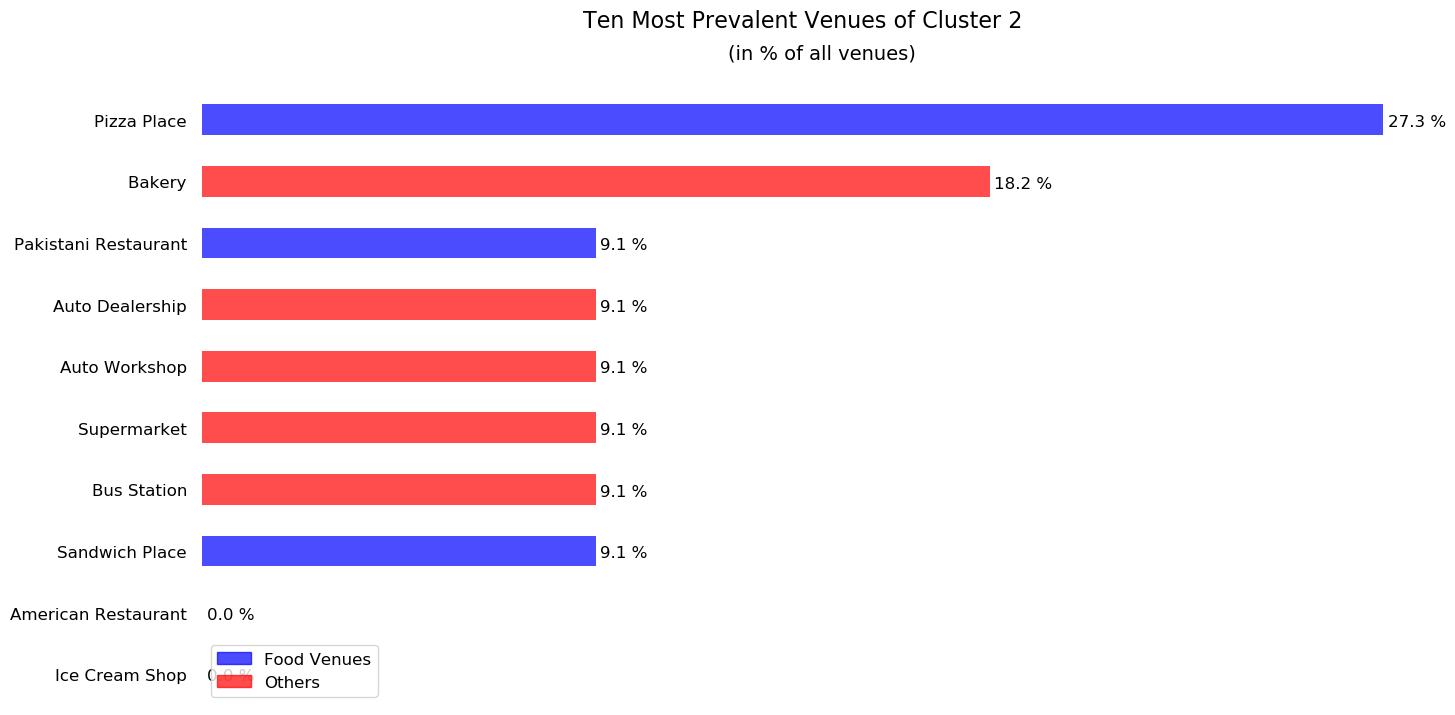

In [108]:
cluster2=pd.DataFrame(kar_results.iloc[2,0:-1]).transpose()
cluster2.sort_values(by='Cluster 2',axis=1,ascending=False,inplace=True)
cluster2.rename(columns={'Residential Building (Apartment / Condo)': 'Apartment / Condo'},inplace=True)
display(cluster2)

clus2=cluster2.iloc[0,9::-1]
generate_plot(clus2,2)

,Café,Pizza Place,Thai Restaurant,Scandinavian Restaurant,Bakery,Indian Restaurant,Grocery Store,Sushi Restaurant,Park,Gym / Fitness Center,Restaurant,Hotel,Beach,Plaza,Bus Stop,Convenience Store,Italian Restaurant,Coffee Shop,Playground,Asian Restaurant,Metro Station,Supermarket,Bookstore,Vietnamese Restaurant,Salad Place,Food Truck,Burger Joint,Hostel,Boat or Ferry,Greek Restaurant,Liquor Store,French Restaurant,Museum,Persian Restaurant,Furniture / Home Store,Mini Golf,Bar,Clothing Store,Wine Bar,Pub,History Museum,Bus Station,Ice Cream Shop,Pier,Cocktail Bar,Other Nightlife,Bistro,Forest,Deli / Bodega,Art Museum,Indie Theater,Flea Market,Gym,Juice Bar,Harbor / Marina,Tapas Restaurant,Seafood Restaurant,Chinese Restaurant,Track,Thrift / Vintage Store,Indie Movie Theater,Food Court,Office,Castle,Sandwich Place,Mountain,Tennis Court,Athletics & Sports,Japanese Restaurant,Gastropub,Spa,Golf Course,Gas Station,Historic Site,Monument / Landmark,Event Space,Nightclub,Gift Shop,Mexican Restaurant,Theater,Jazz Club,Department Store,Fast Food Restaurant,Scenic Lookout,Poke Place,Brazilian Restaurant,Bowling Alley,Soccer Field,Dance Studio,Light Rail Station,Yoga Studio,Movie Theater,Shopping Mall,Vegetarian / Vegan Restaurant,Flower Shop,Breakfast Spot,Fountain,Smoke Shop,Chocolate Shop,Modern European Restaurant,Record Shop,Electronics Store,Climbing Gym,Arts & Crafts Store,Spiritual Center,Garden,Shoe Store,Escape Room,Outdoor Sculpture,Beer Bar,Palace,Noodle House,Bus Line,Stadium,Diner,Optical Shop,BBQ Joint,Tram Station,Pedestrian Plaza,Peruvian Restaurant,Szechuan Restaurant,Latin American Restaurant,Pool Hall,Ramen Restaurant,Library,Gaming Cafe,Steakhouse,Tea Room,Farmers Market,Kebab Restaurant,Candy Store,Sports Bar,South Indian Restaurant,Skate Park,Intersection,Mongolian Restaurant,Ethiopian Restaurant,Men's Store,Bagel Shop,Caucasian Restaurant,Bike Shop,Trail,Gourmet Shop,Watch Shop,Hot Dog Joint,Food & Drink Shop,Gluten-free Restaurant,American Restaurant,Spanish Restaurant,Mediterranean Restaurant,Kitchen Supply Store,Karaoke Bar,Fruit & Vegetable Store,Boxing Gym,Middle Eastern Restaurant,Arcade,Train Station,Taco Place,Roof Deck,Dessert Shop,Fried Chicken Joint,Concert Hall,Hotel Bar,Falafel Restaurant,Miscellaneous Shop,Video Game Store,Tourist Information Center,Art Gallery,Sporting Goods Shop,Coworking Space,Cupcake Shop,Czech Restaurant,Newsstand,Accessories Store,Organic Grocery,Multiplex,Photography Lab,Fish Market,Comic Shop,Moving Target,Irish Pub,Polish Restaurant,Theme Restaurant,Building,Church,Fish & Chips Shop,Rafting,Pet Store,Hockey Arena,Shopping Plaza,Music Venue,Hobby Shop,Go Kart Track,General Entertainment,IT Services,Convention Center,Hawaiian Restaurant,Amphitheater,City Hall,Pharmacy,Toy / Game Store,Indonesian Restaurant,South American Restaurant,Lounge
Cluster 3,0.079765,0.045995,0.04052,0.04006,0.037501,0.031719,0.030546,0.02895,0.027802,0.026377,0.022868,0.022635,0.020811,0.019514,0.018777,0.017323,0.016326,0.013141,0.011191,0.011179,0.011096,0.010635,0.010463,0.010377,0.010134,0.009513,0.009462,0.009248,0.009164,0.008999,0.008536,0.008327,0.008268,0.007645,0.007167,0.006746,0.00662,0.006613,0.006236,0.005967,0.005937,0.005905,0.005878,0.005649,0.005636,0.005556,0.005355,0.005051,0.004939,0.004776,0.004769,0.004365,0.004218,0.00415,0.004147,0.004145,0.004089,0.004081,0.003968,0.003882,0.003824,0.003644,0.003559,0.003559,0.003318,0.003268,0.003268,0.003268,0.003064,0.002932,0.002917,0.002778,0.002778,0.002767,0.00269,0.002689,0.002613,0.002534,0.002478,0.002373,0.002299,0.002293,0.002143,0.002058,0.002058,0.002058,0.002058,0.002058,0.001995,0.001979,0.001911,0.001907,0.00186,0.001845,0.001738,0.001725,0.001684,0.001684,0.001684,0.001684,0.001594,0.001588,0.001587,0.001517,0.001502,0.001502,0.001489,0.00141,0.001188,0.001188,0.001188,0.001188,0.001182,0.001182,0.001182,0.001182,0.001182,0.001182,0.001182,0.001182,0.001182,0.001182,0.00117,0.00114,0.001111,0.00099,0.00099,0.000976,0.000961,0

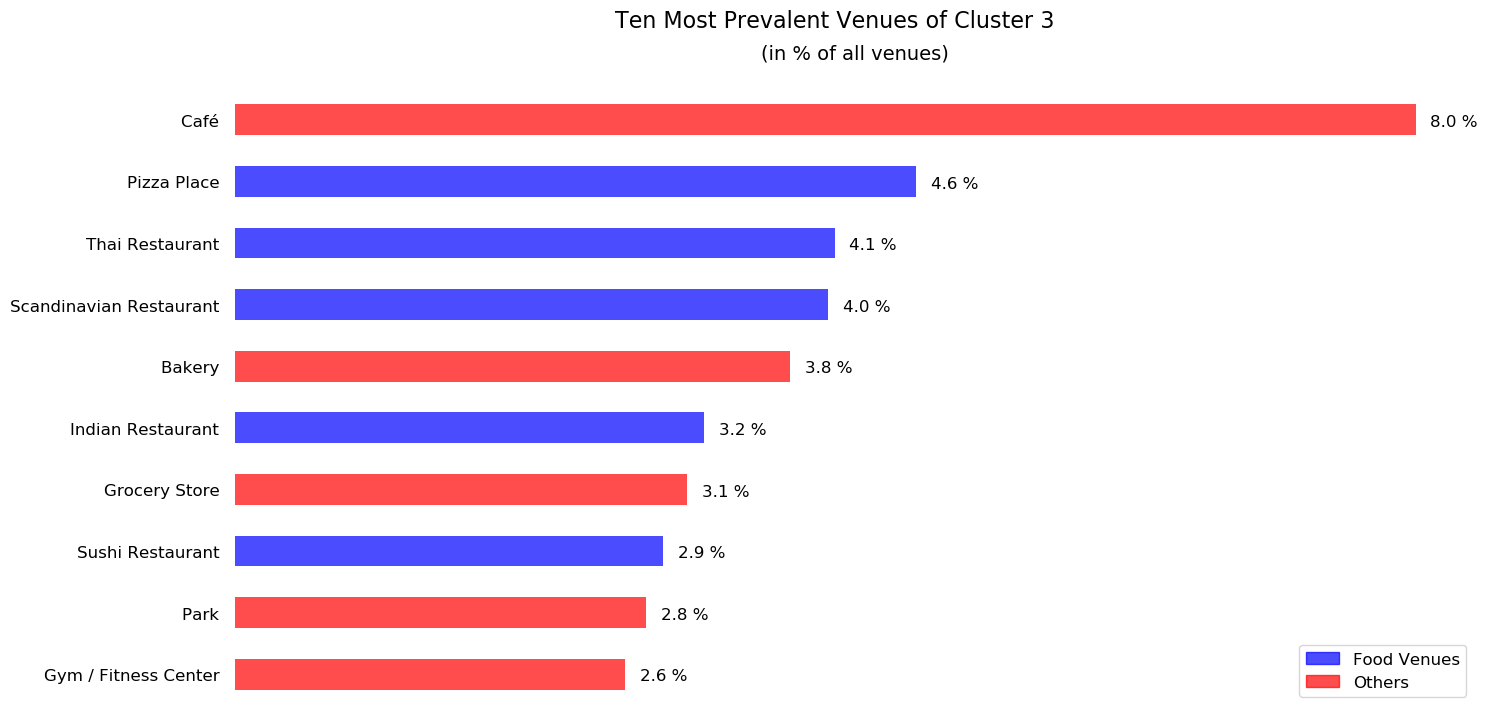

In [194]:
cluster3=pd.DataFrame(kar_results.iloc[3,0:-1]).transpose()
cluster3.sort_values(by='Cluster 3',axis=1,ascending=False,inplace=True)
display(cluster3)

clus3=cluster3.iloc[0,9::-1]
generate_plot(clus3,3)

In [243]:
clus3neigh=kar_merged.loc[kar_merged['Cluster Label'] == 1, kar_merged.columns[0]].values.tolist()
clus3neigh

['Bandhagen',
 'Farsta',
 'Farsta strand',
 'Fruängen',
 'Stora Essingen',
 'Västertorp']

In [244]:
filtered_nhoods=nhoods.copy()

for i in range(0,len(filtered_nhoods)):

    if filtered_nhoods.iloc[i,0] not in clus3neigh:
        filtered_nhoods.iloc[i,0]='TO DROP'

In [245]:
filtered_nhoods=filtered_nhoods[filtered_nhoods.Neighbourhood!='TO DROP']
filtered_nhoods.reset_index(drop=True,inplace=True)

In [246]:
filtered_nhoods

,Neighbourhood,Latitude,Longitude
0,Bandhagen,59.270305,18.049588
1,Farsta,59.245347,18.088366
2,Farsta strand,59.235049,18.102066
3,Fruängen,59.286468,17.964876
4,Stora Essingen,59.321747,17.990692
5,Västertorp,59.291315,17.966692


In [247]:
def get_neighbourhood_Greek_Restaurant(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    #print('DataFrame',dataframe)
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    #print('Filtered columns',filtered_columns)
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])

In [248]:
category='4bf58dd8d48988d10f941735'#The category for Indian restaurants obtained from https://developer.foursquare.com/docs/resources/categories
radius = 2000
LIMIT=30

In [249]:
for n in range(0,len(filtered_nhoods)):
    url = 'http://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_nhoods.iloc[n,1], 
    filtered_nhoods.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_nhoods.iloc[n,0] + ' -------------------------------------------------')
    get_neighbourhood_Greek_Restaurant(url)
    print('\n\n')

------------------------------------------------- Bandhagen -------------------------------------------------


/Users/awais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,distance,lat,lng
0,Bengal Diner,Indian Restaurant,69,59.269713,18.049985
1,Sundarbans,Indian Restaurant,2062,59.270910,18.085827





------------------------------------------------- Farsta -------------------------------------------------


/Users/awais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,distance,lat,lng
0,Ekota India,Indian Restaurant,270,59.24292,18.088667





------------------------------------------------- Farsta strand -------------------------------------------------


/Users/awais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,distance,lat,lng
0,Ekota India,Indian Restaurant,1161,59.24292,18.088667





------------------------------------------------- Fruängen -------------------------------------------------


/Users/awais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,distance,lat,lng
0,Lavong,Indian Restaurant,198,59.284746,17.965792
1,Bollywood street food,Food Truck,2129,59.296662,17.996564
2,The Spice Room,Indian Restaurant,2001,59.298758,17.990577
3,Indian Lotus,Indian Restaurant,1646,59.297474,17.984235





------------------------------------------------- Stora Essingen -------------------------------------------------


/Users/awais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,distance,lat,lng
0,Gandhi,Indian Restaurant,1160,59.316564,18.008413
1,Spice Corner,Indian Restaurant,1180,59.328777,18.006254
2,Mughal Food,Food Truck,2208,59.329041,18.026861
3,Mumbai Garden,Indian Restaurant,1780,59.328533,18.019072
4,Mumbai Dreams,Indian Restaurant,2065,59.338208,18.007464
5,Spice Bangla bar & kök,Asian Restaurant,2064,59.338179,18.007554
6,Indisk Wok,Indian Restaurant,2250,59.310072,18.023046
7,Bombay Taj,Indian Restaurant,1941,59.305497,18.003091
8,Indian Garden,Indian Restaurant,2211,59.339680,18.007446





------------------------------------------------- Västertorp -------------------------------------------------


/Users/awais/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,distance,lat,lng
0,Lavong,Indian Restaurant,733,59.284746,17.965792
1,Amazing India,Indian Restaurant,2275,59.299450,18.003411
2,Bollywood street food,Food Truck,1799,59.296662,17.996564
3,Indian Lotus,Indian Restaurant,1210,59.297474,17.984235
4,Indian street food,Indian Restaurant,2304,59.299494,18.003942
5,The Spice Room,Indian Restaurant,1590,59.298758,17.990577


In [250]:
filter2_nhoods=filtered_nhoods[(filtered_nhoods.Neighbourhood !='Park La Brea') & (filtered_nhoods.Neighbourhood !='Hancock Park')]
filter2_nhoods.reset_index(drop=True,inplace=True)
filter2_nhoods

,Neighbourhood,Latitude,Longitude
0,Bandhagen,59.270305,18.049588
1,Farsta,59.245347,18.088366
2,Farsta strand,59.235049,18.102066
3,Fruängen,59.286468,17.964876
4,Stora Essingen,59.321747,17.990692
5,Västertorp,59.291315,17.966692


In [251]:
filter2_nhoods = filter2_nhoods.reindex( columns = filter2_nhoods.columns.tolist() + ['Distance from stockholm center (in km)'])  #this way to avoid warnings

In [252]:
from math import radians, sin, cos, acos

slat = radians(59.3292) #Stm center Latitude obtained earlier
slon = radians(18.0686) #Stm center Longitude obtained earlier

In [253]:
for n in range(0,len(filter2_nhoods)):
    
    elat = radians(filter2_nhoods.iloc[n,1])
    elon = radians(filter2_nhoods.iloc[n,2])

    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    filter2_nhoods.loc[n,'Distance from stockholm center (in km)']=dist

In [254]:
filter2_nhoods.sort_values(by='Distance from stockholm center (in km)',inplace=True)
filter2_nhoods.reset_index(drop=True,inplace=True)
filter2_nhoods

,Neighbourhood,Latitude,Longitude,Distance from stockholm center (in km)
0,Stora Essingen,59.321747,17.990692,4.496574
1,Bandhagen,59.270305,18.049588,6.637193
2,Västertorp,59.291315,17.966692,7.155108
3,Fruängen,59.286468,17.964876,7.565392
4,Farsta,59.245347,18.088366,9.391358
5,Farsta strand,59.235049,18.102066,10.640258
